# 專題簡介與目標

有買房需求，考慮台北市、新北市、台中市和高雄市的房子，用內政部不動產交易實價登錄資料先了解行情  
使用資料: 
台北市 Taipei(A_lvr_land_A.csv)、新北市 New_Taipei(F_lvr_land_A.csv)、  
台中市 Taichung(B_lvr_land_A.csv)、高雄市 Kaohsiung(E_lvr_land_A.csv)

### 資料的萃取、清理和串接  
1. 不動產資料檔案讀取並串接  
2. 資料清理與切片  
3. 建立自定義特徵加入分析  

### 資料視覺化應用  
1. Group by之後將資料視覺化去看資料各縣市的分佈  
2. 用折線圖和長條圖呈現房價與建物型態間的變化  

### 使用的 Python 程式庫  
Pandas、Matplotlib  

1. 資料讀取可以利用 Pandas 讀 csv 檔案，並將資料做串接  
   去除遺失值  
   欄位的資料型態觀察與更改  
   類別資料編碼  
   資料切片，擷取需要分析的資料  
   尋找異常值  
2. 利用相關係數可以分析數據之間的關係為高相關或低相關，正相關或負相關  
3. 利用 Pandas 中的 .plot() 即可做到簡易的資料視覺化  

### 1. 不動產資料檔案讀取並串接

讀取csv檔  
台北市: A_lvr_land_A.csv  
新北市: B_lvr_land_A.csv  
台中市: E_lvr_land_A.csv  
高雄市: F_lvr_land_A.csv

In [12]:
import pandas as pd

In [13]:
data_a = pd.read_csv('./real estate/A_lvr_land_A.csv')
data_b = pd.read_csv('./real estate/B_lvr_land_A.csv')
data_e = pd.read_csv('./real estate/E_lvr_land_A.csv')
data_f = pd.read_csv('./real estate/F_lvr_land_A.csv')

### 1-2. 刪除英文翻譯列

In [14]:
#刪除row=0資料
data_a = data_a.drop([0])
data_b = data_b.drop([0])
data_e = data_e.drop([0])
data_f = data_f.drop([0])

### 1-3. 增加 city 欄位 和 給欄位值
台北市Taipei(A_lvr_land_A.csv)  
新北市New_Taipei(F_lvr_land_A.csv)  
台中市Taichung(B_lvr_land_A.csv)  
高雄市Kaohsiung(E_lvr_land_A.csv)  

In [15]:
#指定新增在第0欄
data_a.insert(0, 'City', 'Taipei')
data_b.insert(0, 'City', 'Taichung')
data_e.insert(0, 'City', 'Kaohsiung')
data_f.insert(0, 'City', 'New_Taipei')

### 1-4.合併四份資料

In [16]:
all_data = pd.concat([data_a,data_b,data_e,data_f], axis=0) #axis = 0直向合併
all_data.info()
#all_data.to_excel('all_conbin_data.xlsx')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47835 entries, 1 to 15577
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           47835 non-null  object 
 1   鄉鎮市區           47835 non-null  object 
 2   交易標的           47835 non-null  object 
 3   土地位置建物門牌       47835 non-null  object 
 4   土地移轉總面積平方公尺    47835 non-null  object 
 5   都市土地使用分區       43492 non-null  object 
 6   非都市土地使用分區      3137 non-null   object 
 7   非都市土地使用編定      3131 non-null   object 
 8   交易年月日          47835 non-null  object 
 9   交易筆棟數          47835 non-null  object 
 10  移轉層次           39914 non-null  object 
 11  總樓層數           39902 non-null  object 
 12  建物型態           47835 non-null  object 
 13  主要用途           38419 non-null  object 
 14  主要建材           39906 non-null  object 
 15  建築完成年月         39223 non-null  object 
 16  建物移轉總面積平方公尺    47835 non-null  object 
 17  建物現況格局-房       47835 non-null  object 
 18  建物現況格局

# 2. 資料清理與切片

自住，所以刪除住宿用途以外的資料，並且限制  

交易年月日，限制在107年含以上的資料  
建物現況格局-房，1-5間  
建物現況格局-廳，1-2廳  

### 2-1. columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用

a. columns_mapping: 將原中文欄位名稱，改為英文欄位名稱，以利後續分析  
b. analysis_columns: 需要分析的欄位  
c. columns_type: 欄位型態轉換  

In [17]:
columns_mapping = {'鄉鎮市區':'towns',
                   '交易標的':'transaction_sign',
                   '土地區段位置建物區段門牌':'house_number',
                   '土地位置建物門牌':'address',
                   '土地移轉總面積平方公尺':'land_area_square_meter', 
                   '都市土地使用分區':'use_zoning', 
                   '非都市土地使用分區':'land_use_district',
                   '非都市土地使用編定':'land_use',
                   '交易年月日':'tx_dt', 
                   '交易筆棟數':'transaction_pen_number', 
                   '移轉層次':'shifting_level', 
                   '總樓層數':'total_floor_number', 
                   '建物型態':'building_state', 
                   '主要用途':'main_use', 
                   '主要建材':'main_materials',
                   '建築完成年月':'complete_date', 
                   '建物移轉總面積平方公尺':'building_area_square_meter', 
                   '建物現況格局-房':'room_number', 
                   '建物現況格局-廳':'hall_number', 
                   '建物現況格局-衛':'health_number', 
                   '建物現況格局-隔間':'compartmented_number', 
                   '有無管理組織':'manages', 
                   '總價元':'total_price', 
                   '單價元平方公尺':'unit_price', 
                   '車位類別':'berth_category', 
                   '車位移轉總面積(平方公尺)':'berth_area_square_meter',
                   '車位總價元':'berth_price', 
                   '備註':'note', 
                   '編號':'serial_number', 
                   '主建物面積':'main_building_area', 
                   '附屬建物面積':'auxiliary_building_area', 
                   '陽台面積':'balcony_area', 
                   '電梯':'elevator'
                  }
analysis_columns = ['City','towns','main_use','building_state','use_zoning'
                    ,'total_price','building_area_square_meter','main_building_area','tx_dt','unit_price'
                    ,'room_number','hall_number','health_number'
                   ]
columns_type = {'total_price': 'int'
                ,'unit_price':'float'
                ,'building_area_square_meter':'float'
                ,'main_building_area': 'float'
                ,'room_number': 'int'
                ,'hall_number': 'int'
                ,'health_number': 'int'
               }

In [18]:
#將原中文欄位名稱改為英文方便之後分析
analysis_data = all_data.rename(columns=columns_mapping)

In [19]:
#資料清理前，先查看資料
#analysis_data.head(5)
#analysis_data.to_excel('result.xlsx')

### 2-2. 取出主要用途(main_use)為'住家用' 以及都市土地使用分區(use_zoning)為'住'的資料，  
###        並針對以下欄位analysis_columns做分析並去除na值

In [20]:
analysis_data = analysis_data.loc[(analysis_data['main_use'].str.contains('住'))
                                  &(analysis_data['use_zoning'].str.contains('住'))
                                  &(analysis_data['note']!='親友%'),analysis_columns].dropna()

### 2-3. column type 轉換

In [21]:
analysis_data.info()
analysis_data = analysis_data.astype(columns_type)
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25899 entries, 7 to 15576
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        25899 non-null  object 
 1   towns                       25899 non-null  object 
 2   main_use                    25899 non-null  object 
 3   building_state              25899 non-null  object 
 4   use_zoning                  25899 non-null  object 
 5   total_price                 25899 non-null  object 
 6   building_area_square_meter  25899 non-null  object 
 7   main_building_area          25899 non-null  float64
 8   tx_dt                       25899 non-null  object 
 9   unit_price                  25899 non-null  object 
 10  room_number                 25899 non-null  object 
 11  hall_number                 25899 non-null  object 
 12  health_number               25899 non-null  object 
dtypes: float64(1), object(12)
memor

### 2-4. 資料切片  
         a. 指定只看107年資料(tx_dt): 新增欄位(tx_dt_year)
         b. 建物現況格局-房(room_number)，限制在1到5間
         c. 建物現況格局-廳(hall_number)，限制在1到2廳
         d. 最後運用.reset_index()重新定義索引

In [22]:
#a. 指定只看107年以後資料(tx_dt): 新增欄位(tx_dt_year)
analysis_data['tx_dt_year'] = analysis_data['tx_dt'].apply(lambda x: int(x[:-4]))

In [23]:
#b. 建物現況格局-房(room_number)，限制在1到5間
#c. 建物現況格局-廳(hall_number)，限制在1到2廳
#d. 重新定義索引
analysis_data = analysis_data.loc[(analysis_data.tx_dt_year >= 107)
                                  & (analysis_data.room_number >= 1)
                                  & (analysis_data.room_number <= 5)
                                  & (analysis_data.hall_number >= 1)
                                  & (analysis_data.hall_number <= 2)
                                 ]
analysis_data = analysis_data.reset_index(drop=True)

In [24]:
#觀察資料
#analysis_data.head()
#analysis_data.to_excel('result.xlsx')

# 3. 建立自定義特徵加入分析

### 3-1. 定義新特徵 : 1平方公尺相當於0.3025坪  
  
建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺 x 0.3025  
主建物面積坪(main_building_area_square_feet) : 主建物面積 x 0.3025  
單價元坪(unit_price_square_feet) : 單價元平方公尺 / 0.3025  

In [25]:
#新增三個欄位存放單位轉換後的值
analysis_data['building_area_square_feet'] = analysis_data.building_area_square_meter*0.3025
analysis_data['main_building_area_square_feet'] = analysis_data.main_building_area*0.3025
analysis_data['unit_price_square_feet'] = analysis_data.unit_price/0.3025

### 3-2. 觀察資料

In [26]:
analysis_data.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,2.263400e+04,22634.000000,22634.000000,2.263400e+04,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,2.263400e+04
mean,1.372834e+07,138.666648,84.198650,1.042577e+05,2.860740,1.827074,1.856897,109.805470,41.946661,25.470092,3.446535e+05
std,1.107267e+07,63.397566,44.107177,6.350069e+04,0.896023,0.378191,0.899528,0.913346,19.177764,13.342421,2.099196e+05
min,1.000000e+04,1.320000,0.000000,1.510000e+02,1.000000,1.000000,0.000000,107.000000,0.399300,0.000000,4.991736e+02
25%,7.700000e+06,96.462500,57.030000,6.695075e+04,2.000000,2.000000,1.000000,110.000000,29.179906,17.251575,2.213248e+05
50%,1.120000e+07,128.265000,75.870000,8.859500e+04,3.000000,2.000000,2.000000,110.000000,38.800162,22.950675,2.928760e+05
75%,1.616000e+07,166.450000,95.607500,1.285498e+05,3.000000,2.000000,2.000000,110.000000,50.351125,28.921269,4.249579e+05
max,2.667800e+08,695.040000,639.610000,4.290970e+06,5.000000,2.000000,52.000000,111.000000,210.249600,193.482025,1.418502e+07


發現 
main_building_area min是零  
main_building_area_square_feet min是零  
需將其拿掉

In [27]:
analysis_data = analysis_data.loc[(analysis_data.main_building_area > 0)
                                  &(analysis_data.main_building_area_square_feet > 0)]

In [28]:
#拿掉後再觀察資料
analysis_data.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,2.261000e+04,22610.000000,22610.000000,2.261000e+04,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,2.261000e+04
mean,1.372847e+07,138.647946,84.288025,1.042626e+05,2.859487,1.826935,1.855108,109.805175,41.941004,25.497127,3.446699e+05
std,1.107533e+07,63.379094,44.045143,6.348286e+04,0.894956,0.378312,0.896998,0.913742,19.172176,13.323656,2.098607e+05
min,1.000000e+04,2.990000,2.990000,1.510000e+02,1.000000,1.000000,0.000000,107.000000,0.904475,0.904475,4.991736e+02
25%,7.700000e+06,96.445000,57.165000,6.699500e+04,2.000000,2.000000,1.000000,110.000000,29.174612,17.292412,2.214711e+05
50%,1.120000e+07,128.240000,75.930000,8.863550e+04,3.000000,2.000000,2.000000,110.000000,38.792600,22.968825,2.930099e+05
75%,1.616000e+07,166.420000,95.620000,1.285498e+05,3.000000,2.000000,2.000000,110.000000,50.342050,28.925050,4.249579e+05
max,2.667800e+08,695.040000,639.610000,4.290970e+06,5.000000,2.000000,52.000000,111.000000,210.249600,193.482025,1.418502e+07


In [29]:
#觀察資料
#analysis_data.head()
#analysis_data.to_excel('result.xlsx')

# 4. 資料視覺化_房價走勢

### 4-1. 台北市、新北市、台中市和高雄市從107年到111年的房價平均數走勢  
     結論: 110年和111年平均房價持平，高雄市在四個縣市中房價最低

<AxesSubplot:title={'center':'Living Place Price History'}, xlabel='Year', ylabel='Unit price square feet(TWD)'>

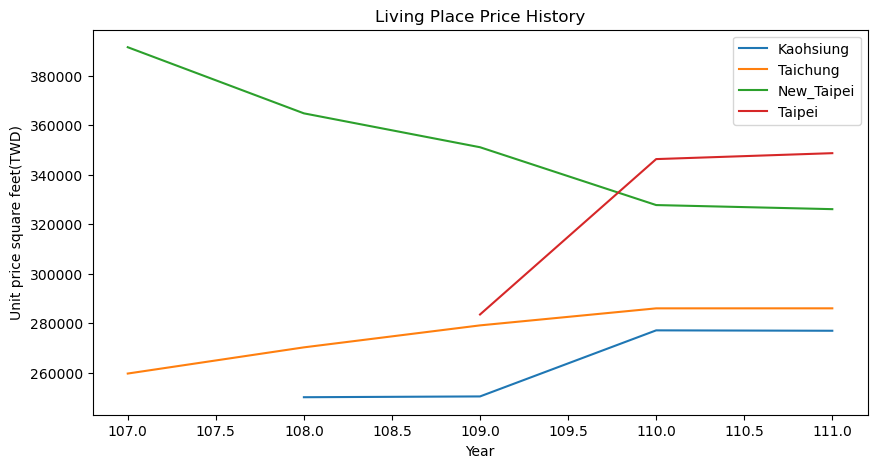

In [30]:
#篩選各縣市(City)的一坪單價，取四分位數25%-75%間的坪單價
prices = {}
for district in set(analysis_data['City']):
    cond = (
        (analysis_data['City'] == district)
        & (analysis_data['unit_price_square_feet'] <= analysis_data["unit_price_square_feet"].quantile(0.75))
        & (analysis_data['unit_price_square_feet'] >= analysis_data["unit_price_square_feet"].quantile(0.25))
        )
    
    groups = analysis_data[cond]['tx_dt_year']
    
    prices[district] = analysis_data[cond]['unit_price_square_feet'].astype(float).groupby(groups).mean()
    
price_history = pd.DataFrame(prices)
price_history.plot(title='Living Place Price History',
                    xlabel='Year',
                    ylabel='Unit price square feet(TWD)',
                    legend=True,                    
                    figsize=(10, 5))

### 4-2. 高雄市從107年到目前的建物型態房價走勢  
     結論:公寓(5樓以下無電梯)的房價大幅下修，華廈(10樓以下有電梯)房價往上升且高於公寓和透天厝價格

In [31]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

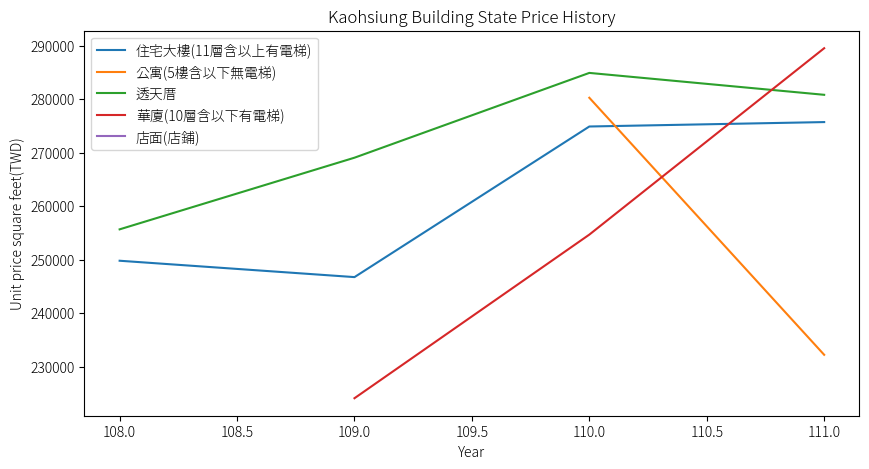

In [32]:
#取高雄市各建案型態的一坪單價，取四分位數25%-75%間的坪單價
building_type_prices = {}
for building_type in set(analysis_data['building_state']):
    cond = (
            (analysis_data["City"]=='Kaohsiung')
           &(analysis_data['unit_price_square_feet'] < analysis_data["unit_price_square_feet"].quantile(0.75))
           & (analysis_data['unit_price_square_feet'] > analysis_data["unit_price_square_feet"].quantile(0.25))
           & (analysis_data['building_state'] == building_type)
     )
    groups = analysis_data[cond]['tx_dt_year']
    
    building_type_prices[building_type] = analysis_data[cond]['unit_price_square_feet'].astype(float).groupby(groups).mean()

plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] #中文亂碼
    
building_type_prices = pd.DataFrame(building_type_prices)

building_type_prices.plot(title='Kaohsiung Building State Price History',
                    xlabel='Year',
                    ylabel='Unit price square feet(TWD)',
                    legend=True,                    
                    figsize=(10, 5))

#plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x))) #x軸整數

# 顯示圖表
plt.show()

### 4-3. 將高雄-前金區的房價單獨拿出來看，並且按照建案型態製作分佈圖
 結論: 110年前金區的住宅大樓每坪落在2萬4到2萬6之間

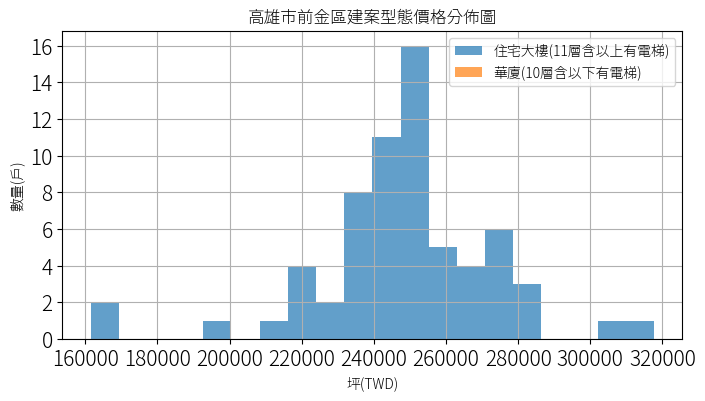

In [33]:
#110年高雄市前金區每坪方35萬內的住宅大樓和華廈價格分佈圖
dfdistrict = analysis_data[(analysis_data['City'] == 'Kaohsiung') 
                            & (analysis_data['towns'] == '前金區') 
                            & (analysis_data['tx_dt_year'] == 110)     
                            & ((analysis_data['building_state'] == '住宅大樓(11層含以上有電梯)') 
                                | (analysis_data['building_state'] == '華廈(10層含以下有電梯)') 
                              # | (analysis_data['building_state'] == '公寓(5樓含以下無電梯)')
                         )]

dfdistrict_filter = dfdistrict[dfdistrict['unit_price_square_feet'] < 350000]
dfdistrict = dfdistrict_filter['unit_price_square_feet'].groupby(dfdistrict['building_state'])
dfdistrict.plot ( kind='hist'
                , alpha=0.7
                , bins=20
                , title='高雄市前金區建案型態價格分佈圖'
                , grid=True
                , figsize=(8,4)
                , fontsize=15
                , legend=True)
plt.xlabel('坪(TWD)')
plt.ylabel("數量(戶)")
plt.show()